<a href="https://colab.research.google.com/github/EmmaMills1002/linearRegression/blob/main/LinearRegressionassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [1]:
import pandas as pd
df = pd.read_csv('/content/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [2]:
print(df.loc[:, ['Price', 'Neighbourhood ']].groupby('Neighbourhood ').describe())
print('Manhattan is the most expensive on average')

                  Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0  
Manhattan is the most expensive on average


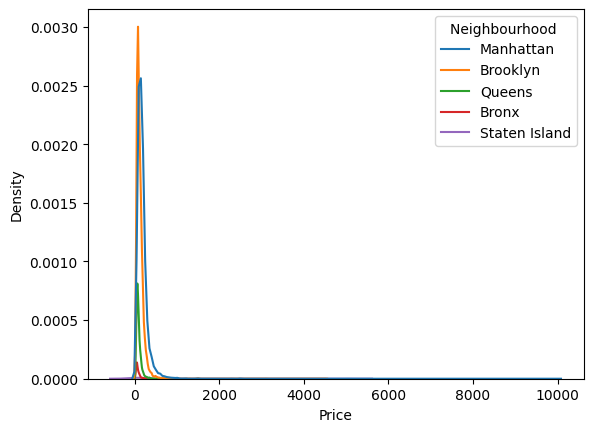

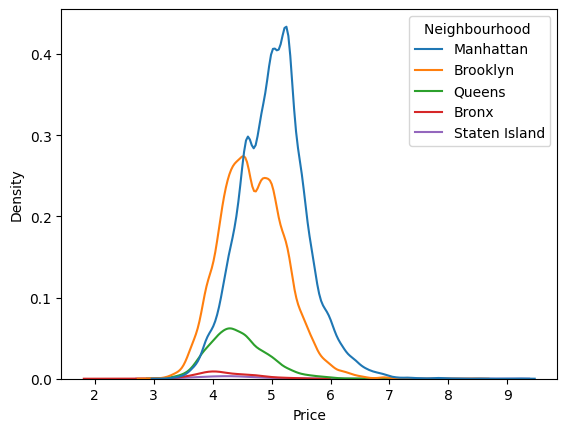

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

1. Manhattan is the most expensive on average, while the Bronx is the least.

In [4]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


2. The group means in question 1 are the same as the coefficients of a regression on the neighborhood dummy, which means that regression is computing the group averages.

In [6]:

y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)
print(reg.intercept_)

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
75.27649769585331


3. In this case, the Bronx became the reference category and the mean/coefficient becomes the intercept value, so the other coefficient values are now relative to the Bronx. To return to the values in question 2, add the intercept to the current coefficients.

In [7]:

results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


In [8]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [9]:
100*1.032257 + 89.4

192.6257

4. This means that for a review score rating of 100, the most expensive option is in Manhattan, at a cost of 192.63 per night.

In [10]:

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [11]:

110.617+53.69+100*.0626

170.567

5. This tells us that for an entire home/apt, that is rated 100, the most expensive option is in Manhattan at a cost of 170.57.

6. The change in Review Scores Rating is due to the fact that room type is included in the second regression, which means that some variation in price is likely due to room type by neighborhood, and the coefficient no longer includes the prediction that is correlated with room type.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: >

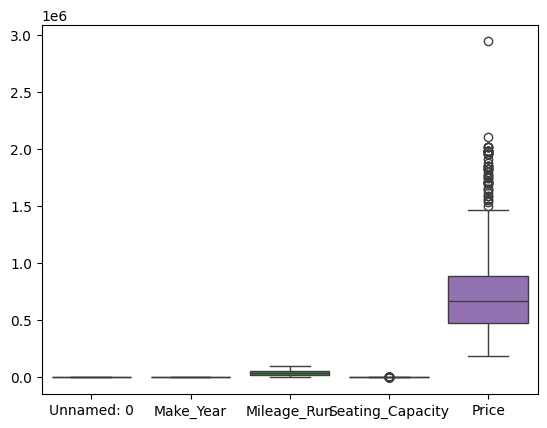

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/cars_hw.csv')
df0 = df
sns.boxplot(data=df)

<Axes: >

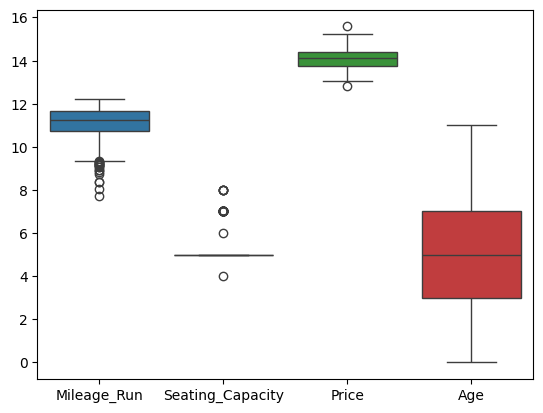

In [27]:
df['Price'] = np.arcsinh(df['Price'])
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])
df['Age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Make_Year','Unnamed: 0'],axis=1)
sns.boxplot(data=df)

<Axes: xlabel='Price', ylabel='Density'>

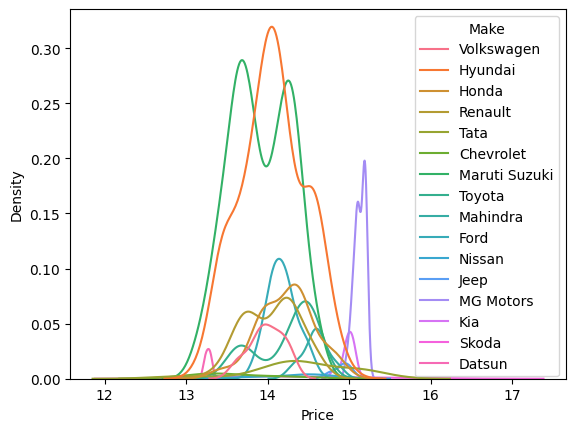

In [28]:
sns.kdeplot(x=df['Price'], hue=df['Make'])

In [31]:
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


2. MG Motors are the most expensive, followed by Kia. I was not surprised to see that most brands have one peak, representing the market they specialize in.

In [33]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['Price']

df_test = df[train_size:]
y_test = df_test['Price']

In [35]:
from sklearn import linear_model

# Numeric regression:
var_n = ['Age','Mileage_Run','Seating_Capacity'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.4750029165676338
Numeric only RMSE:  0.315306526303132


In [36]:
# Categorical regression:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
#
# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]
#
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) # Run regression
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) # R2

Categorical only Rsq:  0.6328712991859702
Categorical only RMSE:  0.26367179960539366


In [37]:

# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All Rsq:  0.8028754721887323
All RMSE:  0.19320788554451906


4. The combined numeric and categorical variables model worked the best, with an RSQ of 0.80 and an RMSE of 0.19.

In [38]:

from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2

1  Rsq:  0.8028754721887323
1 RMSE:  0.19320788554451906
2  Rsq:  0.7958960342124006
2 RMSE:  0.19659851643200377
3  Rsq:  0.7991066849963434
3 RMSE:  0.1950460938705124
4  Rsq:  -5738945313092.952
4 RMSE:  1042486.7835840778


The best degree is 1, though 3 is also close with RSQs of 0.803 and 0.799, respectively, and RMSEs of 0.193 and 0.195. At 4 degrees, the RSQ becomes negative and RMSE is very large.

<Axes: xlabel='Price'>

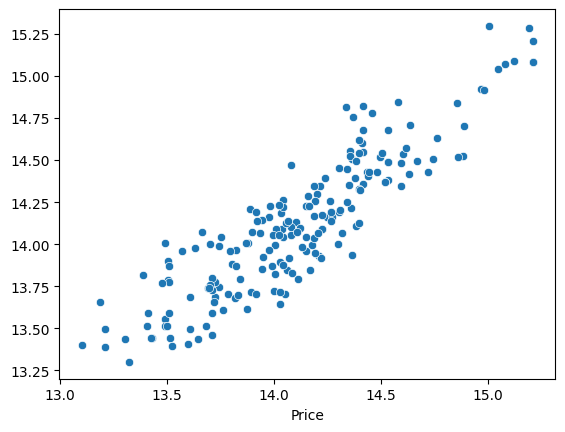

In [39]:
d = 1
#
expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
# Reset indices for concatenating:
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
# Run regression
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
# Predictions and residuals:
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

<Axes: xlabel='Price', ylabel='Density'>

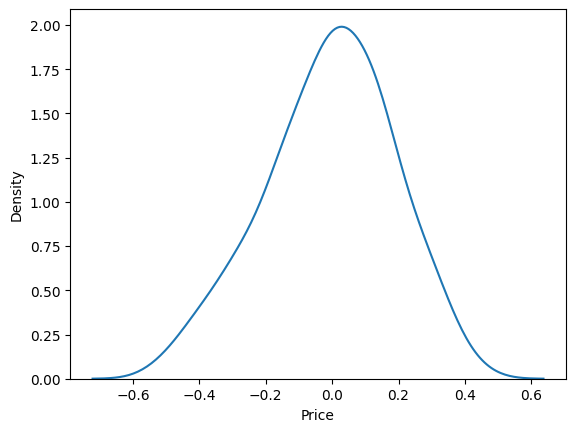

In [40]:
sns.kdeplot(residuals)

6. The residual graph looks very symmetrical and uni-modal. It is bell-shaped around zero.